In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import cv2
import os
from google.colab.patches import cv2_imshow

In [ ]:
images = []
truths = []
for root, dirs, filenames in os.walk('/content/drive/MyDrive/ai_hub/green_seg/green_seg/'):
  for filename in filenames:

    first, last = os.path.splitext(filename)
    if (first[-1] != '_' ):
      continue
    image_path = os.path.join(root, first[: -1] + '.jpg')#png파일을 jpg로 변경
    image = cv2.imread(image_path)
    if image is None:
      print(filename)
      continue
    images.append(image)
    truth_path = os.path.join(root, filename)
    seg = cv2.imread(truth_path)
    seg_bin=np.all(seg == [0,255,0], axis=2) | np.all(seg == [1,255,0], axis=2)
    truths.append(seg_bin)

len(images), len(truths)



(8, 8)

In [ ]:
# model
def model(sample):
    hsv = cv2.cvtColor(sample, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    segment = (34 < h) & (h < 65) & (s > 70) & (v > 50)
    return segment

In [ ]:
segments = []
for image in images:
  segment = model(image)
  segments.append(segment)

for segment, truth in zip(segments, truths):
  acc = np.mean(segment == truth)
  print(acc)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


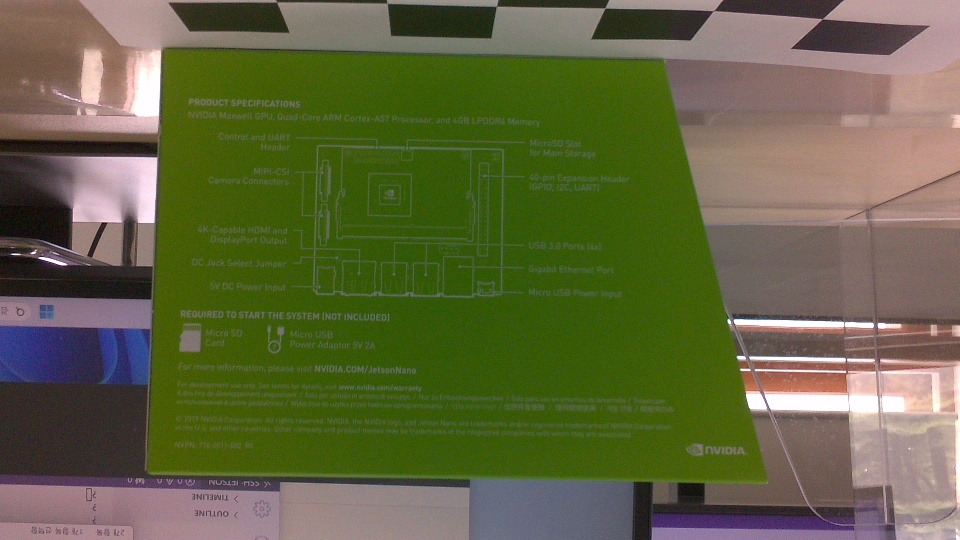

In [ ]:
seg = cv2.imread('/content/drive/MyDrive/ai_hub/green_seg/green_seg/1.jpg')
cv2_imshow(seg)

In [ ]:
np.linspace(0, 10, 11)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [ ]:
#
probs = []
for sample, truth in samples:
    p = model(sample)
    probs.append(p)

thres_list = []
acc_list = []
for thres in np.linspace(0.01, 0.4, 1000):
    total = 0
    for p, (sample, truth) in zip(probs, samples):
        pred = int(p > thres)
        if pred == truth:
            total += 1
    acc = total / len(samples)

    acc_list.append(acc)
    thres_list.append(thres)


In [ ]:
# 모든 샘플에 대해서 모델을 적용한다.
# 그 결과로 probs(모델 결과 모음) 를 가져온다.

#thre를 다양하게 적용해서 acc를 확인한다.
#    acc는 모든 probs에 대해서 thres를 적용한 결과이다.
#    (thres, acc) 둘을 각각 리스트에 저장해야 한다.

probs = []
for sample, _ in samples:
    prob = model(sample)
    probs.append(prob)


probs = [model(sample) for sample, truth in samples]
probs = np.array(probs)
truths = np.array([truth for sample, truth in samples])

thres_list = []
acc_list = []
for thres in np.linspace(0.01, 0.4):
    pred = probs > thres
    acc = (pred == truths).mean()

    thres_list.append(thres)
    acc_list.append(acc)

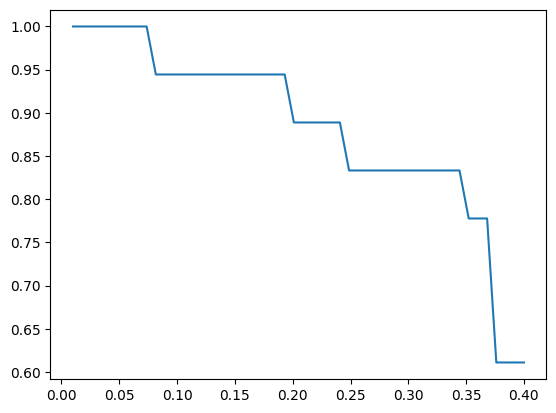

In [ ]:
import matplotlib.pyplot as plt
plt.plot(thres_list, acc_list, '-')